In [3]:
print("hello world")

hello world


# Install, Import, Settings

In [ ]:
# !pip install kaggle
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 6.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 1.5 MB/s eta 0:00:0000:0100:01


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error, mean_squared_error, r2_score

In [5]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# About the Data

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Insurance Premium Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files
- train.csv - the training dataset; Premium Amount is the continuous target
- test.csv - the test dataset; your objective is to predict target Premium Amount for each row
- sample_submission.csv - a sample submission file in the correct format

Insurance Premium Prediction Dataset

Problem Statement
- The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

Dataset Overview
- This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

Features
- Age: Age of the insured individual (Numerical)
- Gender: Gender of the insured individual (Categorical: Male, Female)
- Annual Income: Annual income of the insured individual (Numerical, skewed)
- Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
- Number of Dependents: Number of dependents (Numerical, with missing values)
- Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
- Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
- Health Score: A score representing the health status (Numerical, skewed)
- Location: Type of location (Categorical: Urban, Suburban, Rural)
- Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
- Previous Claims: Number of previous claims made (Numerical, with outliers)
- Vehicle Age: Age of the vehicle insured (Numerical)
- Credit Score: Credit score of the insured individual (Numerical, with missing values)
- Insurance Duration: Duration of the insurance policy (Numerical, in years)
- Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
- Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
- Customer Feedback: Short feedback comments from customers (Text)
- Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
- Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
- Property Type: Type of property owned (Categorical: House, Apartment, Condo)

Data Characteristics
- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like Annual Income and Premium Amount have skewed distributions, which can be addressed through transformations.

- Based on another Kaggler's EDA their belief is that this data is for Auto Insurance premiums

# Read in Data

In [7]:
train = pd.read_csv("data/train.csv")

In [14]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [12]:
train.shape

(1200000, 21)

In [10]:
# downsampling the data to reduce processing time
train_sampled = train.sample(frac=0.25, random_state=42)

In [9]:
# Save the downsampled DataFrame to a CSV file
train_sampled.to_csv('data/train_sampled.csv', index=False)

NameError: name 'train_sampled' is not defined

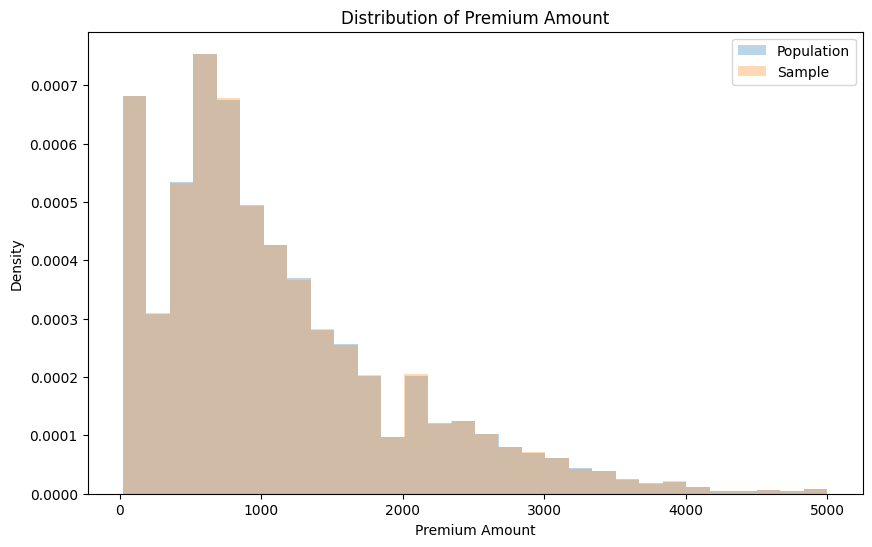

In [63]:
# visually inspecting the distribution of the response variable in the Population and Down-sampled sample.
plt.figure(figsize=(10, 6))
plt.hist(train['Premium Amount'], bins=30, alpha=0.3, label='Population', density=True)
plt.hist(train_sampled['Premium Amount'], bins=30, alpha=0.3, label='Sample', density=True)
plt.xlabel('Premium Amount')
plt.ylabel('Density')
plt.title('Distribution of Premium Amount')
plt.legend()
plt.show()


In [16]:
round(train.describe(),2)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1200000.00,1181295.00,1155051.00,1090328.00,1125924.00,835971.00,1199994.00,1062118.00,1199999.00,1200000.00
mean,599999.50,41.15,32745.22,2.01,25.61,1.00,9.57,592.92,5.02,1102.54
std,346410.31,13.54,32179.51,1.42,12.20,0.98,5.78,149.98,2.59,865.00
min,0.00,18.00,1.00,0.00,2.01,0.00,0.00,300.00,1.00,20.00
25%,299999.75,30.00,8001.00,1.00,15.92,0.00,5.00,468.00,3.00,514.00
50%,599999.50,41.00,23911.00,2.00,24.58,1.00,10.00,595.00,5.00,872.00
75%,899999.25,53.00,44634.00,3.00,34.53,2.00,15.00,721.00,7.00,1509.00
max,1199999.00,64.00,149997.00,4.00,58.98,9.00,19.00,849.00,9.00,4999.00


In [29]:
# dtypes all seem to be correct
train.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income           float64
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score            float64
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

## Missing Data

In [85]:
round(train.isna().sum() / len(train)*100)

id                       0.0
Age                      2.0
Gender                   0.0
Annual Income            4.0
Marital Status           2.0
Number of Dependents     9.0
Education Level          0.0
Occupation              30.0
Health Score             6.0
Location                 0.0
Policy Type              0.0
Previous Claims         30.0
Vehicle Age              0.0
Credit Score            11.0
Insurance Duration       0.0
Policy Start Date        0.0
Customer Feedback        6.0
Smoking Status           0.0
Exercise Frequency       0.0
Property Type            0.0
Premium Amount           0.0
dtype: float64

In [11]:
train_cleansed = train.dropna()
train_sampled_cleansed = train_sampled.dropna()

## Features

In [12]:
numerical_features = train.select_dtypes(include=['number'])
object_features = train.select_dtypes(include=['object'])

In [70]:
object_features.head()

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,Female,Divorced,Master's,NaN,Rural,Comprehensive,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,Male,Divorced,High School,Self-Employed,Suburban,Premium,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,Male,Married,Bachelor's,NaN,Rural,Basic,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,Male,Single,Bachelor's,Self-Employed,Rural,Premium,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [71]:
object_features['Occupation'].unique()

array(['Self-Employed', nan, 'Employed', 'Unemployed'], dtype=object)

In [42]:
train[train['Occupation'].isna()].head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0


- Occupation (values are Self-Employed, NaN/Missing, Employed, or Unemployed) is null in 30% of records and the belief is that we're reviewing Auto Insurance data.  A value should be imputed given the magnitude of the nulls (or at least compare imputed/no-imputation performance) and thoughtfully considered given that this is Auto Insurance and Self-Employed could indicate insurance for a business vs. personal vehicle.

## Split Data

In [390]:
train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [13]:
predictors = [
    # Numerical
    'Age',
    'Annual Income', 
    'Number of Dependents', 
    'Health Score',
    'Previous Claims', 
    'Vehicle Age', 
    'Credit Score', 
    'Insurance Duration',
    
    # Object
    'Gender',
    'Marital Status',
    'Education Level',
    'Occupation',
    'Location',
    'Policy Type',
    # 'Policy Start Date',
    'Customer Feedback',
    'Smoking Status',
    'Exercise Frequency',
    'Property Type'
]

response = [
    'Premium Amount'
]

In [14]:
ordinal_features = [
    'Education Level'
    ] 

nominal_features = [
    'Gender',
    'Marital Status',
    'Smoking Status',
    'Occupation',
    'Policy Type',
    'Exercise Frequency',
    'Property Type',
    'Customer Feedback'
    ] 

numerical_features = [
    'Age',
    'Annual Income', 
    'Number of Dependents', 
    'Health Score',
    'Previous Claims', 
    'Vehicle Age', 
    'Credit Score', 
    'Insurance Duration',
    ] 

In [19]:
X = train[predictors]
y = train[response]

In [395]:
X.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,Female,Married,Bachelor's,Self-Employed,Urban,Premium,Poor,No,Weekly,House
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,Male,Single,Bachelor's,Self-Employed,Rural,Premium,Poor,Yes,Weekly,House
7,48.0,127237.0,2.0,5.769783,1.0,11.0,398.0,5.0,Female,Divorced,High School,Employed,Suburban,Comprehensive,Average,No,Rarely,Condo
9,44.0,52447.0,2.0,20.473718,1.0,9.0,635.0,3.0,Male,Married,Master's,Employed,Urban,Comprehensive,Poor,No,Daily,Condo
15,18.0,6076.0,2.0,7.442964,1.0,12.0,584.0,5.0,Male,Married,High School,Employed,Urban,Premium,Good,Yes,Monthly,Apartment


In [384]:
y.head()

,Premium Amount
0,2869.0
4,2022.0
7,111.0
9,64.0
15,849.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Models

### Fit Model

#### Baseline Model

From the competition discussion (https://www.kaggle.com/competitions/playground-series-s4e12/discussion/549909) the baseline CV=1.09, LB=1.09

In [374]:
y_pred['Premium Amount'] = y_test['Premium Amount']
y_pred

,Premium Amount
1146132,1612.0
712800,1211.0
897820,1777.0
3606,3187.0
382987,892.0
...,...
196364,623.0
873948,740.0
466524,834.0
538149,4108.0


In [375]:
baseline_pred = np.exp(np.mean(np.log1p(train['Premium Amount'])))-1
baseline_pred

np.float64(729.6166383132163)

In [376]:
y_pred['Premium Amount'] = baseline_pred
y_pred

,Premium Amount
1146132,729.616638
712800,729.616638
897820,729.616638
3606,729.616638
382987,729.616638
...,...
196364,729.616638
873948,729.616638
466524,729.616638
538149,729.616638


In [377]:
y_test

,Premium Amount
1146132,1612.0
712800,1211.0
897820,1777.0
3606,3187.0
382987,892.0
...,...
196364,623.0
873948,740.0
466524,834.0
538149,4108.0


In [378]:
# Competition Metric
print(f"Root Mean Squared Log Error: {root_mean_squared_log_error(y_test, y_pred):.2f}")

Root Mean Squared Log Error: 1.09


#### Linear Regression

In [386]:
model = LinearRegression().fit(X_train, y_train)

In [387]:
y_pred = model.predict(X_test)

# Competition Metric
print(f"Root Mean Squared Log Error: {root_mean_squared_log_error(y_test, y_pred):.2f}")
print(f"R^2: {r2_score(y_test, y_pred):.2f}")

Root Mean Squared Log Error: 1.16
R^2: 0.00


#### Decision Tree Regressor

In [397]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

# Competition Metric
print(f"Root Mean Squared Log Error: {root_mean_squared_log_error(y_test, y_pred):.2f}")

ValueError: could not convert string to float: 'Male'

#### Gradient Boosting Regressor

In [17]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
X_train.isna().sum()

Age                      12553
Annual Income            30106
Number of Dependents     73594
Health Score             49733
Previous Claims         243928
Vehicle Age                  4
Credit Score             92235
Insurance Duration           1
Gender                       0
Marital Status           12471
Education Level              0
Occupation              239837
Location                     0
Policy Type                  0
Customer Feedback        52098
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [28]:
fill_values = {
    # Numeric
    'Age': -999,
    'Annual Income': -999,
    'Number of Dependents': -999,
    'Health Score': -999,
    'Previous Claims': -999,
    'Vehicle Age': -999,
    'Credit Score': -999,
    'Insurance Duration': -999,
    
    # Categorical
    'Marital Status': 'Unknown',
    'Occupation': 'Unknown',
    'Customer Feedback': 'Unknown'
}


In [31]:
X_train_processed = X_train.fillna(fill_values)
X_test_processed = X_test.fillna(fill_values)

In [30]:
education_level_order = ['High School', "Bachelor's", "Master's", 'PhD']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', 'passthrough', numerical_features),
        ('ordinal', OrdinalEncoder(categories=[education_level_order]), ordinal_features),
        ('nominal', OneHotEncoder(drop='first'), nominal_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Fit pipeline
model.fit(X_train_processed, y_train)

/home/vscode/.local/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                              "Master's",
                                                                              'PhD']]),
                                                  ['Education Level']),
                                                 ('nom',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Marital Status',
                                                   'Smoking Status',
                                                   'Occupation', 'Policy Type',
                                                   'Exercise Frequency',
                                                   'Property Type',
                                                   'Customer Feedback'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [32]:
y_pred = model.predict(X_test_processed)

# Competition Metric
print(f"Root Mean Squared Log Error: {root_mean_squared_log_error(y_test, y_pred):.2f}")

Root Mean Squared Log Error: 1.16


#### XGBoost

In [ ]:
# !pip install xgboost
# !pip install --upgrade xgboost

Defaulting to user installation because normal site-packages is not writeable


In [432]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost.sklearn import XGBRegressor
import xgboost as xgb

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ordinal_features),
        ('nom', OneHotEncoder(drop='first'), nominal_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        enable_categorical=True, 
        random_state=42
        ))
])

# Fit the pipeline
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              "Bachelor's",
                                                                          

#### Hist Gradient Boosting Regressor

In [433]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=[education_level_order]), ordinal_features),
        ('nom', OneHotEncoder(drop='first'), nominal_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', HistGradientBoostingRegressor())
])

# Fit the pipeline
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


: 

In [ ]:
y_pred = model.predict(X_test)

# Competition Metric
print(f"Root Mean Squared Log Error: {root_mean_squared_log_error(y_test, y_pred):.2f}")

#### Review Predictions

In [338]:
y_pred = pd.Series(y_pred.ravel(), index=X_test.index)

actual_v_preds = pd.DataFrame({
    'Actual Premium Amount': y_test['Premium Amount'],
    'Predicted Premium Amount': round(y_pred)
})

In [339]:
actual_v_preds = train.join(other=actual_v_preds, how='inner').sort_index()

In [340]:
actual_v_preds['Residual Premium Amount'] = actual_v_preds['Predicted Premium Amount'] - actual_v_preds['Actual Premium Amount']

In [341]:
# Save DataFrame to a CSV file
# actual_v_preds.to_csv('data/actual_v_preds.csv', index=False)

## Submission

In [ ]:
sub = pd.read_csv("data/sample_submission.csv")
sub['Premium Amount'] = y_pred
sub.to_csv("data/submission.csv", index=False)
print("Submission shape: ", sub.shape)
sub.head()

Submission shape:  (800000, 2)


,id,Premium Amount
0,1200000,729.616638
1,1200001,729.616638
2,1200002,729.616638
3,1200003,729.616638
4,1200004,729.616638
